In [1]:
# 워킹 디렉토리 설정
import os
current_dir = os.getcwd()
print("Current working directory:", current_dir) # 기존 디렉토리 확인
os.chdir("C:\\Users\\konkuk_227\\Documents\\연구실 자료\\ASOS") # 데이터 있는 디렉토리로 변경
print("Changed working directory to:", os.getcwd()) # 현 디렉토리 확인
# 디렉토리 경로
dir_path = "C:\\Users\\01071\\Documents\\연구실 자료\\ASOS"

Current working directory: c:\Users\konkuk_227\Documents\코드 모음\잡코드
Changed working directory to: C:\Users\konkuk_227\Documents\연구실 자료\ASOS


In [2]:
import pandas as pd
import numpy as np
import datetime
import time
import re

In [3]:
# # 모든 CSV 파일 목록
# file_list = []
# for file_name in os.listdir(dir_path):
#     if file_name.endswith('.csv'):
#         file_list.append(os.path.join(dir_path, file_name))

# # 모든 CSV 파일을 저장할 빈 DataFrame 객체
# merged_df = pd.DataFrame()

# # 각 CSV 파일을 읽어들여 merged_df에 추가
# for file_name in file_list:
#     df = pd.read_csv(file_name, encoding='cp949')
#     merged_df = pd.concat([merged_df, df])

# # 하나의 CSV 파일로 저장
# merged_df.to_csv("merged.csv", index=False, encoding='cp949')
# merged_df
merged_df = pd.read_csv("merged.csv", encoding='cp949')
# 62개 지점만 추출
station_list = "속초(90), 철원(95)*, 대관령(100), 춘천(101), 강릉(105), 서울(108), 인천(112), 원주(114), 수원(119), 충주(127), 서산(129), 울진(130), 청주(131), 대전(133), 추풍령(135), 안동(136)*, 포항(138), 군산(140), 대구(143), 전주(146), 울산(152), 창원(155)*, 광주(156), 부산(159), 통영(162), 목포(165), 여수(168), 완도(170), 진주(192), 강화(201), 양평(202), 이천(203), 인제(211), 홍천(212), 태백(216)*, 제천(221), 보은(226), 천안(232), 보령(235), 부여(236), 금산(238), 부안(243), 임실(244), 정읍(245), 남원(247), 장수(248)*, 장흥(260), 해남(261), 고흥(262), 봉화(271)*, 영주(272), 문경(273), 영덕(277), 의성(278), 구미(279), 영천(281), 거창(284), 합천(285), 밀양(288), 산청(289), 거제(294), 남해(295)"
# 위의 station_list 에서 숫자만 추출하여 리스트로 저장한다.
station_number_list = [int(num) for num in re.findall(r'\d+', station_list)]
# 지점 번호와 같은 행만 추출한다.
selected_data = merged_df[merged_df["지점"].isin(station_number_list)]
# "일시" 열의 데이터 타입을 datetime으로 변경
selected_data["일시"] = pd.to_datetime(selected_data["일시"])
# groupby() 함수를 사용하여 같은 지점끼리 그룹을 만들고, 각 그룹에서 날짜순으로 재정렬한다.
selected_data_grouped = selected_data.groupby("지점명").apply(lambda x: x.sort_values("일시"))
# reset_index() 함수를 사용하여 인덱스를 초기화한다.
selected_data_grouped = selected_data_grouped.reset_index(drop=True)
# # # 지점이 187인 곳은 삭제한다.
# # selected_data_grouped = selected_data_grouped[selected_data_grouped["지점"] != 187]
# # selected_data_grouped
selected_data_grouped.to_csv("ASOS(73~22).csv", index=False, encoding='cp949')

C:\Users\konkuk_227\AppData\Local\Temp\ipykernel_16772\3998445879.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data["일시"] = pd.to_datetime(selected_data["일시"])


In [4]:
# 데이터 프레임 불러오기
selected_data_grouped = pd.read_csv("ASOS(73~22).csv", encoding='cp949')
# "최저기온 시각열의 값이 있는 행들만 추출
selected_data_grouped = selected_data_grouped[selected_data_grouped["최저기온 시각(hhmi)"].notnull()]
# "date" 열을 인덱스로 설정하여 시계열 데이터프레임으로 변환
selected_data_grouped.set_index("일시", inplace=True)
selected_data_grouped.index = pd.to_datetime(selected_data_grouped.index)

# 각 관측지점별로 비어있는 날짜 확인
for location in selected_data_grouped["지점"].unique():
    location_selected_data_grouped = selected_data_grouped[selected_data_grouped["지점"] == location]
    idx = pd.date_range(start=location_selected_data_grouped.index.min(), end=location_selected_data_grouped.index.max())
    missing_dates = idx[~idx.isin(location_selected_data_grouped.index)]
    if len(missing_dates) > 0:
        print(f"{location}에서 빠진 날짜가 있습니다.")
        print(missing_dates)
    else:
        print(f"{location}에서 빠진 날짜가 없습니다.")

selected_data_grouped.reset_index(inplace=True)
selected_data_grouped

105에서 빠진 날짜가 있습니다.
DatetimeIndex(['1973-10-16'], dtype='datetime64[ns]', freq='D')
201에서 빠진 날짜가 있습니다.
DatetimeIndex(['1973-10-16', '1987-08-12', '1987-08-13', '1987-08-14',
               '1987-08-15', '1987-08-16', '1987-08-17', '2012-08-27',
               '2019-07-31', '2022-10-31', '2022-11-01'],
              dtype='datetime64[ns]', freq=None)
294에서 빠진 날짜가 있습니다.
DatetimeIndex(['1973-10-16', '2012-09-07'], dtype='datetime64[ns]', freq=None)
284에서 빠진 날짜가 있습니다.
DatetimeIndex(['1973-10-16', '1980-12-07', '1982-07-07', '2021-06-06'], dtype='datetime64[ns]', freq=None)
262에서 빠진 날짜가 있습니다.
DatetimeIndex(['1973-10-16'], dtype='datetime64[ns]', freq='D')
156에서 빠진 날짜가 있습니다.
DatetimeIndex(['1973-10-16'], dtype='datetime64[ns]', freq='D')
279에서 빠진 날짜가 있습니다.
DatetimeIndex(['1973-07-18', '1973-07-19', '1973-10-16', '1983-08-09',
               '1983-08-10', '1983-08-11', '1983-08-12', '1986-12-28',
               '1986-12-29'],
              dtype='datetime64[ns]', freq=None)
140에서 빠진 날짜가 있습니다.


,일시,지점,지점명,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),평균 이슬점온도(°C),최소 상대습도(%),최소 상대습도 시각(hhmi),평균 상대습도(%),평균 증기압(hPa)
0,1973-03-01,105,강릉,1.7,-1.6,726.0,5.9,1114.0,-8.3,30.0,1330.0,47.3,3.3
1,1973-03-02,105,강릉,0.9,-2.9,705.0,4.8,1538.0,-11.5,30.0,1230.0,39.0,2.6
2,1973-03-03,105,강릉,4.4,-0.7,600.0,9.7,1705.0,-9.2,28.0,1047.0,36.3,3.1
3,1973-03-04,105,강릉,5.0,0.8,2354.0,7.9,1010.0,-3.5,36.0,2400.0,54.5,4.8
4,1973-03-05,105,강릉,1.1,-2.2,2343.0,6.5,1438.0,-11.7,24.0,1351.0,40.3,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101377,2022-12-27,212,홍천,-7.1,-13.8,747.0,1.7,1506.0,-11.7,36.0,1500.0,72.6,2.6
1101378,2022-12-28,212,홍천,-5.3,-10.7,343.0,0.6,1408.0,-12.5,33.0,1137.0,61.3,2.4
1101379,2022-12-29,212,홍천,-6.2,-13.4,747.0,0.6,1516.0,-13.2,30.0,1459.0,60.9,2.3
1101380,2022-12-30,212,홍천,-4.4,-8.5,2400.0,1.5,1408.0,-9.0,48.0,1354.0,71.6,3.1


In [12]:
# 최저기온 시각(hhmi) 열에 결측치가 있는 경우 그 행은 제거
selected_data_grouped = selected_data_grouped[selected_data_grouped["최저기온 시각(hhmi)"].notnull()]
# 먼저 int 형으로 변환하고
selected_data_grouped["최저기온 시각(hhmi)"] = selected_data_grouped["최저기온 시각(hhmi)"].astype(int)
# 문자열로 변환한다.
selected_data_grouped["최저기온 시각(hhmi)"] = selected_data_grouped["최저기온 시각(hhmi)"].astype(str)
# 그리고 4자리로 맞추기 위해 앞에 0을 채워준다.
selected_data_grouped["최저기온 시각(hhmi)"] = selected_data_grouped["최저기온 시각(hhmi)"].str.zfill(4)
# 그리고 왼쪽에서 2자리를 잘라내서 최저기온 시각(hh) 열을 만든다.
selected_data_grouped["최저기온 시각(hh)"] = selected_data_grouped["최저기온 시각(hhmi)"].str[:2]
# 그리고 끝에서 2자리를 잘라내서 최저기온 시각(mm) 열을 만든다.
selected_data_grouped["최저기온 시각(mm)"] = selected_data_grouped["최저기온 시각(hhmi)"].str[-2:]
# 최저기온 시각 열들을 정수형으로 변환
selected_data_grouped["최저기온 시각(hh)"] = selected_data_grouped["최저기온 시각(hh)"].astype(int)
selected_data_grouped["최저기온 시각(mm)"] = selected_data_grouped["최저기온 시각(mm)"].astype(int)

# 최저기온 시각(hh)열에 이상치들이 있으므로 00 ~ 24 사이의 값들이 아닌 행은 제거한다.
selected_data_grouped = selected_data_grouped[(selected_data_grouped["최저기온 시각(hh)"] >= 0) & (selected_data_grouped["최저기온 시각(hh)"] <= 24)]
# 최저기온 시각(mm)열에 이상치들이 있으므로 00 ~ 59 사이의 값들이 아닌 행은 제거한다.
selected_data_grouped = selected_data_grouped[(selected_data_grouped["최저기온 시각(mm)"] >= 0) & (selected_data_grouped["최저기온 시각(mm)"] <= 59)]
selected_data_grouped
selected_data_grouped["최저기온 시각(hh)"].unique() 
selected_data_grouped["최저기온 시각(mm)"].unique()
selected_data_grouped.loc[selected_data_grouped['최저기온 시각(hh)'] == 24, '최저기온 시각(hh)'] = 0
selected_data_grouped['datetime'] = pd.to_datetime(selected_data_grouped['최저기온 시각(hh)'].astype(str) + ':' + selected_data_grouped['최저기온 시각(mm)'].astype(str), format='%H:%M')

# hour와 minute 열을 합쳐서 datetime 객체로 변환
selected_data_grouped['datetime'] = pd.to_datetime(selected_data_grouped['최저기온 시각(hh)'].astype(str) + ':' + selected_data_grouped['최저기온 시각(mm)'].astype(str), format='%H:%M')

# datetime 객체를 인덱스로 설정
selected_data_grouped.set_index('datetime', inplace=True)

# 조건식을 이용해 범위에 해당하지 않는 행 추출
condition = ~(((selected_data_grouped.index.time >= pd.to_datetime('18:01').time()) & (selected_data_grouped.index.time <= pd.to_datetime('23:59').time())) |
              ((selected_data_grouped.index.time >= pd.to_datetime('00:00').time()) & (selected_data_grouped.index.time <= pd.to_datetime('09:00').time())))
result = selected_data_grouped[condition]

result.reset_index(inplace=True)
# 필요없어진 datetime 열 삭제
result.drop('datetime', axis=1, inplace=True)
# 지점별, 일시의 연도와 월을 사용해서 연도와 월도 고려해 그룹화해서 일시를 카운트 하고 최저기온 시각 열들은 원래 값 나타내기
result_grouped = result.groupby(["지점", "지점명", result["일시"].dt.year, result["일시"].dt.month]).agg({"일시": "count", "최저기온 시각(hh)": "first", "최저기온 시각(mm)": "first", "최저기온(°C)":'first'})
# 인덱스 열의 이름을 바꾸고
result_grouped.index.set_names(["지점", "지점명", "연도", "월"], inplace=True)


result_grouped.reset_index(inplace=True)

In [13]:
result_grouped

,지점,지점명,연도,월,일시,최저기온 시각(hh),최저기온 시각(mm),최저기온(°C)
0,90,속초,1973,3,1,17,52,5.0
1,90,속초,1973,4,3,14,56,12.8
2,90,속초,1973,5,3,17,46,12.3
3,90,속초,1973,7,2,17,32,23.7
4,90,속초,1973,8,2,16,2,24.0
...,...,...,...,...,...,...,...,...
9852,295,남해,2021,7,2,12,27,21.7
9853,295,남해,2021,8,1,14,10,21.3
9854,295,남해,2021,9,1,12,20,19.8
9855,295,남해,2022,6,1,15,51,16.5


In [7]:
# 서울과 양평 지점의 5,6,7,8,9월의 데이터를 추출, 여름만 고려
result_grouped = result_grouped[(result_grouped["지점명"] == "서울") | (result_grouped["지점명"] == "양평")]

In [8]:
# 지점별 연도별로 그룹화해서 총 몇번
result_grouped = result_grouped.groupby(["지점명", "연도"]).agg({"일시": "count"})
result_grouped.reset_index(inplace=True)

In [9]:
result_grouped.dtypes

지점명    object
연도      int32
일시      int64
dtype: object

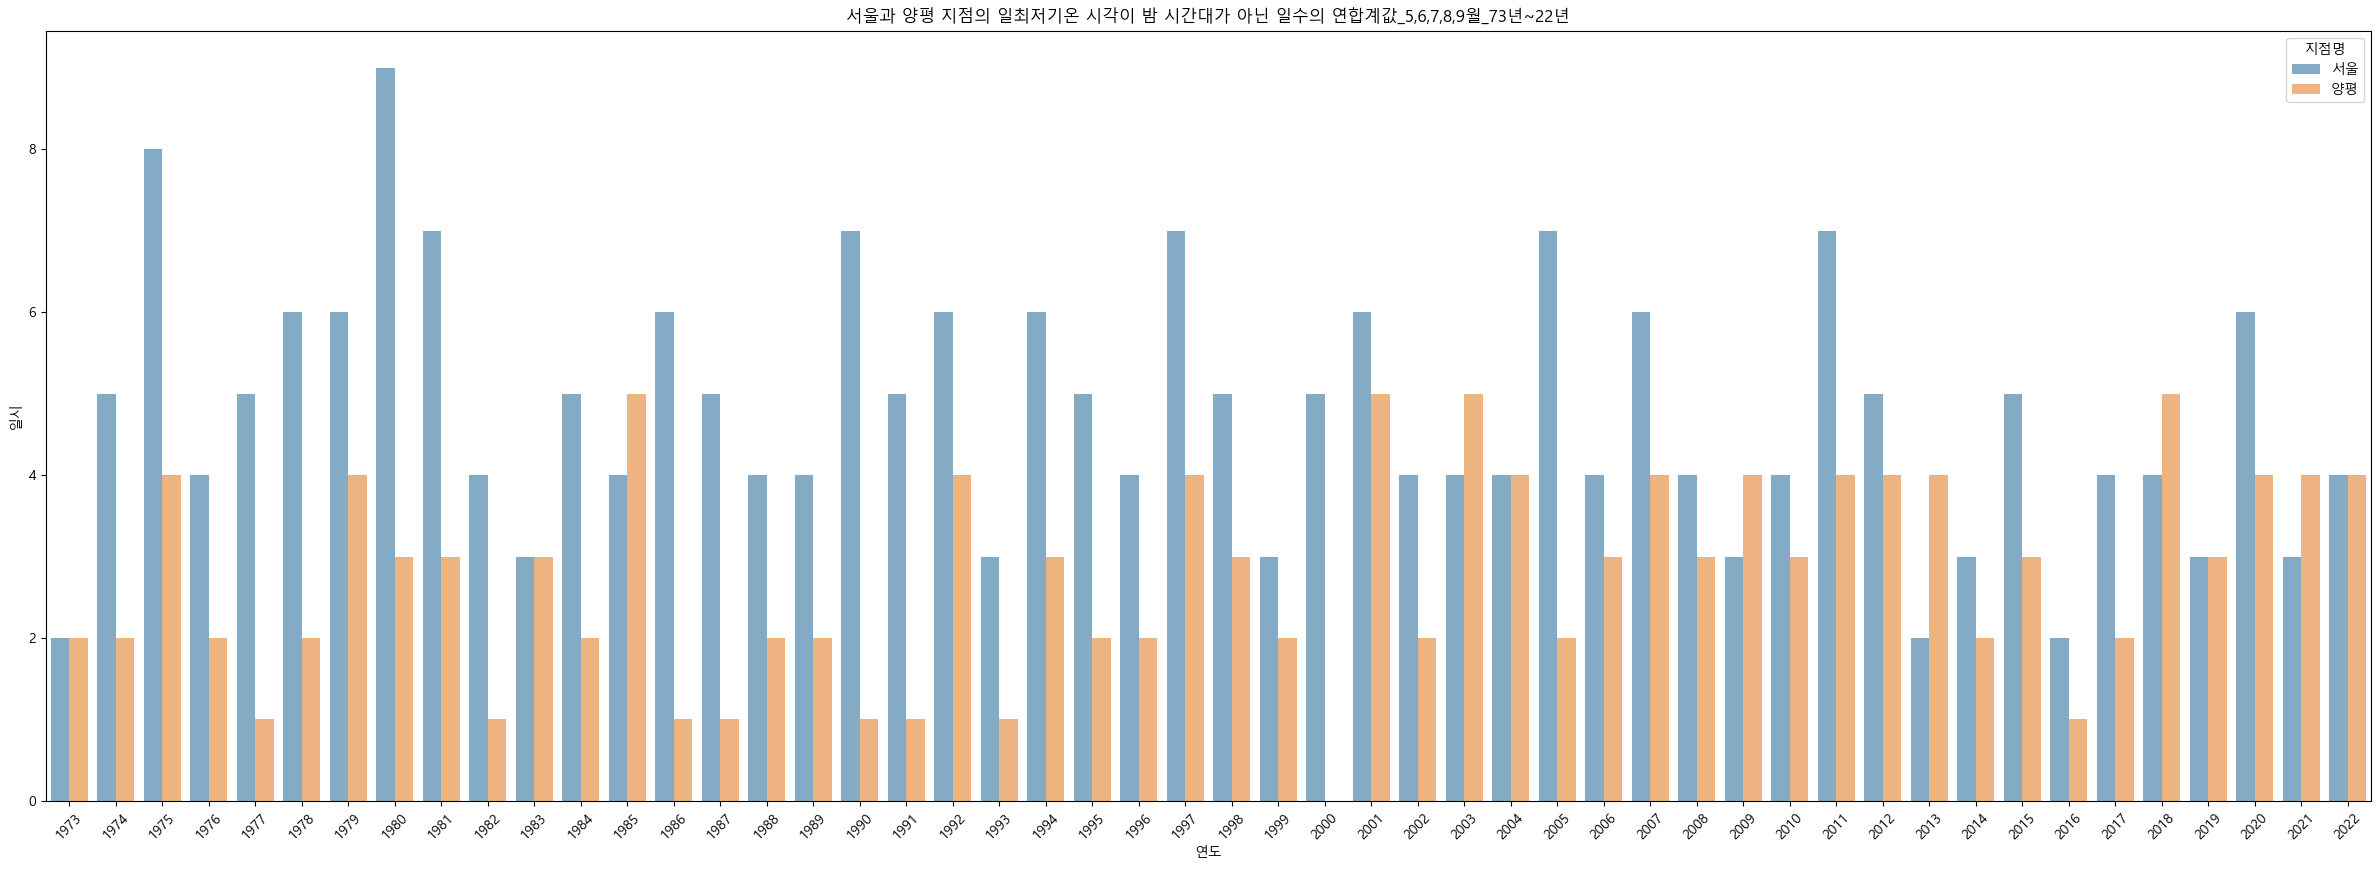

In [10]:
# 지점별 막대그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns
# 경고문구 무시
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 설정
plt.rc("font", family="Malgun Gothic")
plt.figure(figsize=(30, 10))
ax = plt.subplot(111)
sns.barplot(data=result_grouped, x="연도", y="일시", hue="지점명", alpha=.6, ax=ax)
plt.xticks(rotation=45)
plt.title("서울과 양평 지점의 일최저기온 시각이 밤 시간대가 아닌 일수의 연합계값_5,6,7,8,9월_73년~22년")
plt.show()